In [1]:
#configuración en google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# directorios (path):
path = "gdrive/MyDrive/my_notebooks/datasets/"

In [4]:
df = pd.read_excel(path + 'Banafrut.xlsx', sheet_name='Base')
df

,Año,Semana,Zona,Finca,municipio,temp_media,Precipitación,Humedad relativa,Velocidad del viento,Peso total del racimo (kg)
0,2021,1,NORTE,MEDITERRANEO,TURBO,27.52,109.0,80.04,1.3,30.19
1,2021,2,NORTE,MEDITERRANEO,TURBO,27.98,53.0,78.19,1.4,29.41
2,2021,3,NORTE,MEDITERRANEO,TURBO,28.13,34.0,79.82,1.6,29.37
3,2021,4,NORTE,MEDITERRANEO,TURBO,28.03,25.0,80.65,0.9,29.69
4,2021,5,NORTE,MEDITERRANEO,TURBO,27.51,88.0,84.30,1.3,30.14
...,...,...,...,...,...,...,...,...,...,...
448,2024,147,SUR,CORALES,CHIGORODÓ,28.18,42.0,88.90,0.4,16.93
449,2024,148,SUR,CORALES,CHIGORODÓ,28.27,20.0,88.93,0.6,16.75
450,2024,149,SUR,CORALES,CHIGORODÓ,27.87,414.0,88.52,0.7,16.58
451,2024,150,SUR,CORALES,CHIGORODÓ,28.52,129.0,88.80,0.9,16.83


In [5]:
# Obtener información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         453 non-null    int64  
 1   Semana                      453 non-null    int64  
 2   Zona                        453 non-null    object 
 3   Finca                       453 non-null    object 
 4   municipio                   453 non-null    object 
 5   temp_media                  453 non-null    float64
 6   Precipitación               453 non-null    float64
 7   Humedad relativa            453 non-null    float64
 8   Velocidad del viento        453 non-null    float64
 9   Peso total del racimo (kg)  453 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 35.5+ KB


In [6]:
# Identificar columnas de tipo 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Convertir columnas de tipo 'object' a 'category'
for col in object_columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Año                         453 non-null    int64   
 1   Semana                      453 non-null    int64   
 2   Zona                        453 non-null    category
 3   Finca                       453 non-null    category
 4   municipio                   453 non-null    category
 5   temp_media                  453 non-null    float64 
 6   Precipitación               453 non-null    float64 
 7   Humedad relativa            453 non-null    float64 
 8   Velocidad del viento        453 non-null    float64 
 9   Peso total del racimo (kg)  453 non-null    float64 
dtypes: category(3), float64(5), int64(2)
memory usage: 26.6 KB


##Valores nulos

In [7]:
# Revisar presencia de valores nulos en el dataset
df_null = pd.DataFrame(columns=['column','null','total','%'])

for col in df.columns:
  count_null = df[col].isna().sum()
  total = len(df[col])
  percentage = (count_null/total)*100
  df_null.loc[len(df_null)] = [col, count_null, total, percentage]

df_null

,column,null,total,%
0,Año,0,453,0.0
1,Semana,0,453,0.0
2,Zona,0,453,0.0
3,Finca,0,453,0.0
4,municipio,0,453,0.0
5,temp_media,0,453,0.0
6,Precipitación,0,453,0.0
7,Humedad relativa,0,453,0.0
8,Velocidad del viento,0,453,0.0
9,Peso total del racimo (kg),0,453,0.0


## Valores atípicos

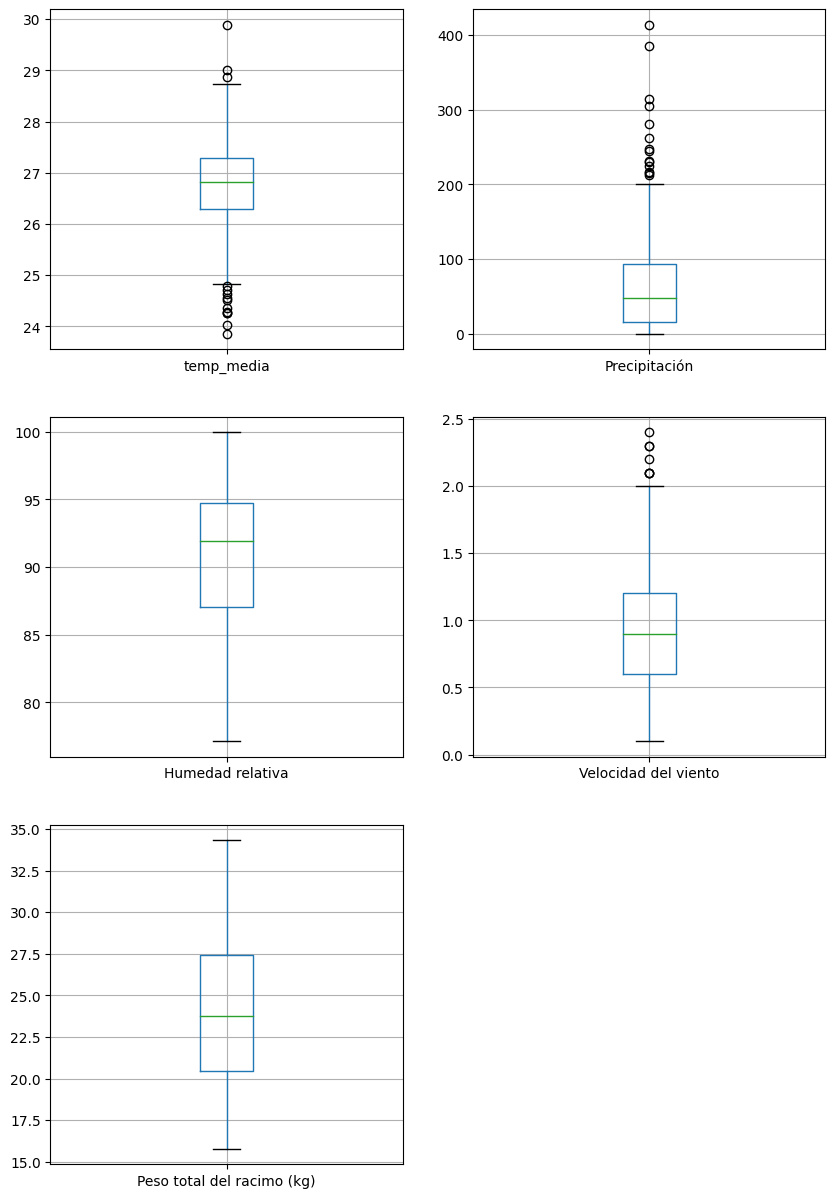

In [8]:
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=['float64']).columns

# Boxplot de columnas numéricas
plt.figure(figsize=(10, 15))
for i, column in enumerate(numeric_columns, 1):
  plt.subplot(3, 2, i)
  df.boxplot(column)
plt.show()

Aunque se observa presencia de outliers para algunas de las variables, son valores que se encuentran dentro del marco de referencia y que no se configuran como valores atípicos para la muestra

##Valores duplicados

In [9]:
# Revisar valores duplicados en el dataset
duplicate_rows = df.duplicated().sum()
print(f'# de registros duplicados: {duplicate_rows}')

# de registros duplicados: 0


##Scatter plots

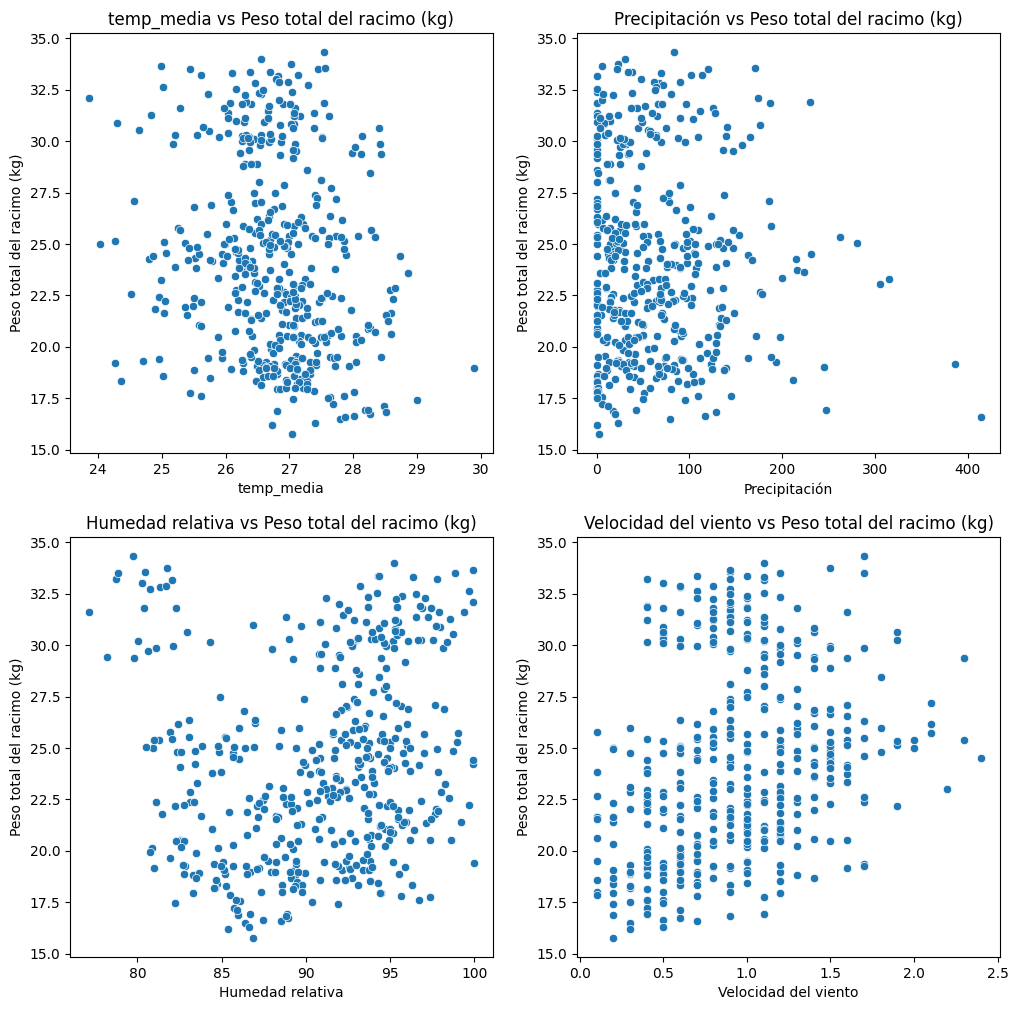

In [10]:
# Lista de variables regresoras
independent_variables = ['temp_media', 'Precipitación', 'Humedad relativa', 'Velocidad del viento']

# Crear scatter plots
plt.figure(figsize=(12, 12))
for i, var in enumerate(independent_variables, 1):
  plt.subplot(2, 2, i)
  sns.scatterplot(x=var, y='Peso total del racimo (kg)', data=df)
  plt.title(f'{var} vs Peso total del racimo (kg)')
  plt.xlabel(var)
  plt.ylabel('Peso total del racimo (kg)')

plt.show()